# Credit Scoring Classification

# Intro
This Model for check creditworthiness of the person to help later compaines to approve the loan or credit the person apply for 

# contents

1. [Import Libraries](#1)
2. [Undertsanding Data](#2)
3. [Loading data](#3)
4. [Editing data](#4)
5. [Handling Missing Values](#5)
    * [Handling Missing Values for Categorigal data](#6)
    * [Handling Missing Values for Numerical data](#7)
6. [Data Preprocessing](#8)
7. [Model Building](#9)

<a id="1"></a>
## Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Understanding Data


* **ID:** Unique ID of the record
* **Customer_ID:** Unique ID of the customer
* **Month:** Month of the year
* **Name:** The name of the person
* **Age:** The age of the person
* **SSN:** Social Security Number of the person
* **Occupation:** The occupation of the person
* **Annual_Income:** The Annual Income of the person
* **Monthly_Inhand_Salary:** Monthly in-hand salary of the person
* **Num_Bank_Accounts:** The number of bank accounts of the person
* **Num_Credit_Card:** Number of credit cards the person is having
* **Interest_Rate:** The interest rate on the credit card of the person
* **Num_of_Loan:** The number of loans taken by the person from the bank
* **Type_of_Loan:** The types of loans taken by the person from the bank
* **Delay_from_due_date:** The average number of days delayed by the person from the date of payment
* **Num_of_Delayed_Payment:** Number of payments delayed by the person
* **Changed_Credit_Card:** The percentage change in the credit card limit of the person
* **Num_Credit_Inquiries:** The number of credit card inquiries by the person
* **Credit_Mix:** Classification of Credit Mix of the customer
* **Outstanding_Debt:** The outstanding balance of the person
* **Credit_Utilization_Ratio:** The credit utilization ratio of the credit card of the customer
* **Credit_History_Age:** The age of the credit history of the person
* **Payment_of_Min_Amount:** Yes if the person paid the minimum amount to be paid only, otherwise no.
* **Total_EMI_per_month:** The total EMI per month of the person
* **Amount_invested_monthly:** The monthly amount invested by the person
* **Payment_Behaviour:** The payment behaviour of the person
* **Monthly_Balance:** The monthly balance left in the account of the person
* **Credit_Score:** The credit score of the person

<a id="3"></a>
## Loading Data

In [3]:
#train data
train_data = pd.read_csv('train.csv',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
# test data 
test_data = pd.read_csv('test.csv',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
print("the shape of train data {}" .format(train_data.shape))
print("the shape of test data {}" .format(test_data.shape))


the shape of train data (100000, 28)
the shape of test data (50000, 27)


In [4]:
data = pd.concat([train_data,test_data],axis=0)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df=data.copy()

In [6]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       141600 non-null  object 
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  object 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.000000,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.006940,117.069476,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,150000.0,22.623447,129.143006,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,150000.0,71.234907,461.537193,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,150000.0,21.063400,14.860154,-5.000000,10.000000,18.000000,28.000000,67.000000
Changed_Credit_Limit,146850.0,10.384299,6.786522,-6.490000,5.330000,9.410000,14.840000,36.970000
Num_Credit_Inquiries,147000.0,28.529014,194.456058,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,150000.0,32.283309,5.113315,20.000000,28.054731,32.297058,36.487954,50.000000
Total_EMI_per_month,150000.0,1432.513579,8403.759977,0.000000,30.947775,71.280006,166.279555,82398.000000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Month,150000,12,January,12500
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,141600,12500,078-73-5990,12
Occupation,139500,15,Lawyer,9899
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112


In [11]:
df['Month']=pd.to_datetime(df['Month'],format="%B").dt.month
df['Month']=df['Month'].astype('Int64')
df['Month'].head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: Int64

<a id='4'> </a>
## Editing data

In [12]:
df['Age']=df['Age'].str.extract("(\d+)").astype(int)
df['Num_of_Loan']=df['Num_of_Loan'].str.extract("(\d+)").astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  Int64  
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       141600 non-null  object 
 6   Occupation                139500 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              132888 non-null  object 

In [14]:
num_features_cols=["Outstanding_Debt","Annual_Income","Amount_invested_monthly","Monthly_Balance"]

for i in num_features_cols:
    df[i]=df[i].str.extract(r"(\d+\.\d+)").astype(float)

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [15]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.extract("(\d+)").astype(float)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,150000.0,6.5,3.452064,1.0,3.75,6.5,9.25,12.0
Age,150000.0,119.33794,682.554219,14.0,25.0,34.0,43.0,8698.0
Annual_Income,150000.0,173055.202531,1404214.602713,7005.93,19455.49,37578.61,72796.905,24198062.0
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.0,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.00694,117.069476,-1.0,3.0,6.0,7.0,1798.0
Num_Credit_Card,150000.0,22.623447,129.143006,0.0,4.0,5.0,7.0,1499.0
Interest_Rate,150000.0,71.234907,461.537193,1.0,8.0,13.0,20.0,5799.0
Num_of_Loan,150000.0,10.941093,63.04546,0.0,2.0,3.0,6.0,1496.0
Delay_from_due_date,150000.0,21.0634,14.860154,-5.0,10.0,18.0,28.0,67.0
Num_of_Delayed_Payment,139500.0,30.934301,224.530918,0.0,9.0,14.0,18.0,4399.0


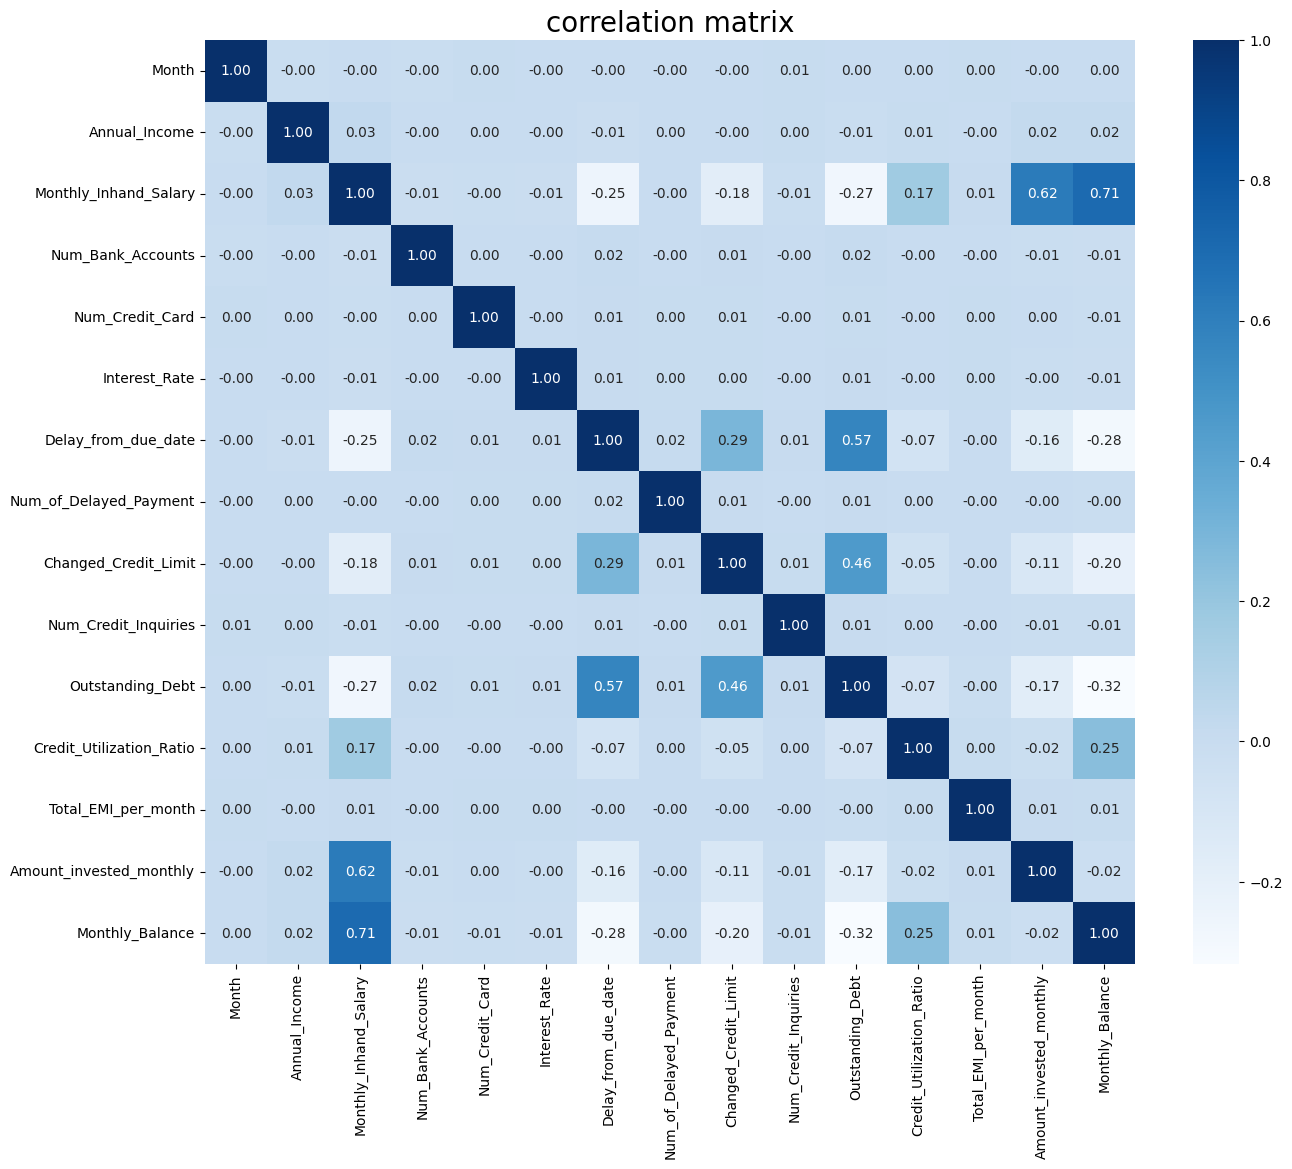

In [17]:
df_corr=df.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="black",fontsize=20)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
plt.show()

<a id="5"></a>
## Handling Missing Values

In [19]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly     13230
Payment_Behaviour           11400
Monthly_Balance              3445
Credit_Score                50000
dtype: int64

<a id="6"></a>
## Handling Missing Values for Categorigal data

<h2> 1) Name

<h5>Each Customer_ID found made 12 records (12 transaction operations)
So Must name to be attached to each Customer ID 

In [20]:
df['Customer_ID'].value_counts()

Customer_ID
CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: count, Length: 12500, dtype: int64

In [21]:
df[df['Customer_ID']=='CUS_0x9d89']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33360,0xd97a,CUS_0x9d89,1,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,39.189500,31 Years and 11 Months,Yes,0.0,170.224718,Low_spent_Small_value_payments,272.223573,Standard
33361,0xd97b,CUS_0x9d89,2,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,35.593981,32 Years and 0 Months,Yes,0.0,103.032323,High_spent_Small_value_payments,309.415968,Standard
33362,0xd97c,CUS_0x9d89,3,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,38.698235,32 Years and 1 Months,Yes,0.0,200.436016,Low_spent_Small_value_payments,242.012276,Standard
33363,0xd97d,CUS_0x9d89,4,da Costan,500,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,NaN,99.41,33.898387,32 Years and 2 Months,Yes,0.0,85.498186,Low_spent_Small_value_payments,356.950105,Standard
33364,0xd97e,CUS_0x9d89,5,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,35.308527,32 Years and 3 Months,Yes,0.0,NaN,High_spent_Small_value_payments,337.248686,Standard
33365,0xd97f,CUS_0x9d89,6,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,36.602201,NaN,Yes,0.0,109.771783,Low_spent_Small_value_payments,332.676509,Standard
33366,0xd980,CUS_0x9d89,7,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,40.227683,32 Years and 5 Months,NM,0.0,67.427194,High_spent_Small_value_payments,345.021098,Standard
33367,0xd981,CUS_0x9d89,8,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,36.482982,32 Years and 6 Months,NM,0.0,64.002765,High_spent_Small_value_payments,348.445527,Standard
16680,0xd982,CUS_0x9d89,9,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,NaN,99.41,31.286758,32 Years and 7 Months,NM,0.0,132.490454,Low_spent_Medium_value_payments,299.957838,NaN
16681,0xd983,CUS_0x9d89,10,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,27.327874,32 Years and 8 Months,Yes,0.0,66.550363,Low_spent_Small_value_payments,375.897929,NaN


In [22]:
df["Name"].fillna(value=df.groupby("Customer_ID")["Name"].transform(lambda x: x.mode().iloc[0]),inplace=True)
df[df['Customer_ID']=='CUS_0x9d89']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33360,0xd97a,CUS_0x9d89,1,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,39.189500,31 Years and 11 Months,Yes,0.0,170.224718,Low_spent_Small_value_payments,272.223573,Standard
33361,0xd97b,CUS_0x9d89,2,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,35.593981,32 Years and 0 Months,Yes,0.0,103.032323,High_spent_Small_value_payments,309.415968,Standard
33362,0xd97c,CUS_0x9d89,3,da Costan,27,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,38.698235,32 Years and 1 Months,Yes,0.0,200.436016,Low_spent_Small_value_payments,242.012276,Standard
33363,0xd97d,CUS_0x9d89,4,da Costan,500,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,NaN,99.41,33.898387,32 Years and 2 Months,Yes,0.0,85.498186,Low_spent_Small_value_payments,356.950105,Standard
33364,0xd97e,CUS_0x9d89,5,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,35.308527,32 Years and 3 Months,Yes,0.0,NaN,High_spent_Small_value_payments,337.248686,Standard
33365,0xd97f,CUS_0x9d89,6,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,36.602201,NaN,Yes,0.0,109.771783,Low_spent_Small_value_payments,332.676509,Standard
33366,0xd980,CUS_0x9d89,7,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,40.227683,32 Years and 5 Months,NM,0.0,67.427194,High_spent_Small_value_payments,345.021098,Standard
33367,0xd981,CUS_0x9d89,8,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,36.482982,32 Years and 6 Months,NM,0.0,64.002765,High_spent_Small_value_payments,348.445527,Standard
16680,0xd982,CUS_0x9d89,9,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,NaN,99.41,31.286758,32 Years and 7 Months,NM,0.0,132.490454,Low_spent_Medium_value_payments,299.957838,NaN
16681,0xd983,CUS_0x9d89,10,da Costan,28,576-38-5212,Entrepreneur,18413.795,1524.482917,5,...,Standard,99.41,27.327874,32 Years and 8 Months,Yes,0.0,66.550363,Low_spent_Small_value_payments,375.897929,NaN


In [23]:
df['Name'].isna().sum()

0

<h2> 2) SSN

<h5>Each Customer_ID found made 12 records (12 transaction operations)
So Must SSN Number to be attached to each Customer ID 
so each customer has 12 records matched the same SSN

In [24]:
df[df['SSN']=='642-73-7670']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
66410,0x19b20,CUS_0xb3bd,3,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.712013,15 Years and 3 Months,No,31932.000000,NaN,High_spent_Large_value_payments,729.103292,Standard
66413,0x19b23,CUS_0xb3bd,6,Solarinaa,42,642-73-7670,Architect,22598167.00,8024.3625,5,...,Good,64.69,32.676386,15 Years and 6 Months,No,182.275831,562.651102,Low_spent_Medium_value_payments,337.509317,Standard
66414,0x19b24,CUS_0xb3bd,7,Solarinaa,42,642-73-7670,Architect,95596.35,NaN,5,...,Good,64.69,27.350554,15 Years and 7 Months,No,182.275831,NaN,High_spent_Large_value_payments,797.298122,Standard
66415,0x19b25,CUS_0xb3bd,8,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,36.288241,15 Years and 8 Months,No,182.275831,572.886897,Low_spent_Large_value_payments,317.273523,Standard
33205,0x19b27,CUS_0xb3bd,10,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.797105,15 Years and 10 Months,No,182.275831,344.923238,Low_spent_Medium_value_payments,555.237182,NaN
33206,0x19b28,CUS_0xb3bd,11,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.637358,15 Years and 11 Months,No,182.275831,89.648876,High_spent_Large_value_payments,770.511544,NaN


In [25]:
df[df['Customer_ID']=='CUS_0xb3bd']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
66408,0x19b1e,CUS_0xb3bd,1,Solarinaa,42,NaN,Architect,95596.35,8024.3625,5,...,Good,64.69,35.831332,15 Years and 1 Months,No,182.275831,206.812170,High_spent_Large_value_payments,653.348249,Good
66409,0x19b1f,CUS_0xb3bd,2,Solarinaa,42,NaN,Architect,95596.35,8024.3625,5,...,Good,64.69,31.658594,15 Years and 2 Months,No,182.275831,728.666101,Low_spent_Medium_value_payments,171.494318,Good
66410,0x19b20,CUS_0xb3bd,3,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.712013,15 Years and 3 Months,No,31932.000000,NaN,High_spent_Large_value_payments,729.103292,Standard
66411,0x19b21,CUS_0xb3bd,4,Solarinaa,42,NaN,Architect,95596.35,8024.3625,5,...,Good,64.69,35.592492,15 Years and 4 Months,No,182.275831,94.113148,High_spent_Medium_value_payments,776.047272,Standard
66412,0x19b22,CUS_0xb3bd,5,Solarinaa,42,NaN,Architect,95596.35,8024.3625,5,...,Good,64.69,30.357404,15 Years and 5 Months,NM,182.275831,382.287077,Low_spent_Small_value_payments,527.873342,Standard
66413,0x19b23,CUS_0xb3bd,6,Solarinaa,42,642-73-7670,Architect,22598167.00,8024.3625,5,...,Good,64.69,32.676386,15 Years and 6 Months,No,182.275831,562.651102,Low_spent_Medium_value_payments,337.509317,Standard
66414,0x19b24,CUS_0xb3bd,7,Solarinaa,42,642-73-7670,Architect,95596.35,NaN,5,...,Good,64.69,27.350554,15 Years and 7 Months,No,182.275831,NaN,High_spent_Large_value_payments,797.298122,Standard
66415,0x19b25,CUS_0xb3bd,8,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,36.288241,15 Years and 8 Months,No,182.275831,572.886897,Low_spent_Large_value_payments,317.273523,Standard
33204,0x19b26,CUS_0xb3bd,9,Solarinaa,42,NaN,Architect,95596.35,8024.3625,5,...,Good,64.69,34.711578,15 Years and 9 Months,NM,182.275831,78.125162,High_spent_Large_value_payments,782.035257,NaN
33205,0x19b27,CUS_0xb3bd,10,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.797105,15 Years and 10 Months,No,182.275831,344.923238,Low_spent_Medium_value_payments,555.237182,NaN


In [26]:
df["SSN"].fillna(value=df.groupby("Customer_ID")["SSN"].transform(lambda x: x.mode().iloc[0]),inplace=True)
df[df['Customer_ID']=='CUS_0xb3bd']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
66408,0x19b1e,CUS_0xb3bd,1,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,35.831332,15 Years and 1 Months,No,182.275831,206.812170,High_spent_Large_value_payments,653.348249,Good
66409,0x19b1f,CUS_0xb3bd,2,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,31.658594,15 Years and 2 Months,No,182.275831,728.666101,Low_spent_Medium_value_payments,171.494318,Good
66410,0x19b20,CUS_0xb3bd,3,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.712013,15 Years and 3 Months,No,31932.000000,NaN,High_spent_Large_value_payments,729.103292,Standard
66411,0x19b21,CUS_0xb3bd,4,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,35.592492,15 Years and 4 Months,No,182.275831,94.113148,High_spent_Medium_value_payments,776.047272,Standard
66412,0x19b22,CUS_0xb3bd,5,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,30.357404,15 Years and 5 Months,NM,182.275831,382.287077,Low_spent_Small_value_payments,527.873342,Standard
66413,0x19b23,CUS_0xb3bd,6,Solarinaa,42,642-73-7670,Architect,22598167.00,8024.3625,5,...,Good,64.69,32.676386,15 Years and 6 Months,No,182.275831,562.651102,Low_spent_Medium_value_payments,337.509317,Standard
66414,0x19b24,CUS_0xb3bd,7,Solarinaa,42,642-73-7670,Architect,95596.35,NaN,5,...,Good,64.69,27.350554,15 Years and 7 Months,No,182.275831,NaN,High_spent_Large_value_payments,797.298122,Standard
66415,0x19b25,CUS_0xb3bd,8,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,36.288241,15 Years and 8 Months,No,182.275831,572.886897,Low_spent_Large_value_payments,317.273523,Standard
33204,0x19b26,CUS_0xb3bd,9,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,34.711578,15 Years and 9 Months,NM,182.275831,78.125162,High_spent_Large_value_payments,782.035257,NaN
33205,0x19b27,CUS_0xb3bd,10,Solarinaa,42,642-73-7670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.797105,15 Years and 10 Months,No,182.275831,344.923238,Low_spent_Medium_value_payments,555.237182,NaN


In [27]:
df["SSN"]=df["SSN"].apply(lambda x:int("".join(x.split("-"))) if pd.notna(x) else x).astype(np.int64)

<h2> 3) Occupation

<h4> Do Same operation as SSN and Name

In [28]:
df["Occupation"].fillna(value=df.groupby("Customer_ID")["Occupation"].transform(lambda x: x.mode().iloc[0]),inplace=True)
df[df['Customer_ID']=='CUS_0xb3bd']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
66408,0x19b1e,CUS_0xb3bd,1,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,35.831332,15 Years and 1 Months,No,182.275831,206.812170,High_spent_Large_value_payments,653.348249,Good
66409,0x19b1f,CUS_0xb3bd,2,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,31.658594,15 Years and 2 Months,No,182.275831,728.666101,Low_spent_Medium_value_payments,171.494318,Good
66410,0x19b20,CUS_0xb3bd,3,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.712013,15 Years and 3 Months,No,31932.000000,NaN,High_spent_Large_value_payments,729.103292,Standard
66411,0x19b21,CUS_0xb3bd,4,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,35.592492,15 Years and 4 Months,No,182.275831,94.113148,High_spent_Medium_value_payments,776.047272,Standard
66412,0x19b22,CUS_0xb3bd,5,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,30.357404,15 Years and 5 Months,NM,182.275831,382.287077,Low_spent_Small_value_payments,527.873342,Standard
66413,0x19b23,CUS_0xb3bd,6,Solarinaa,42,642737670,Architect,22598167.00,8024.3625,5,...,Good,64.69,32.676386,15 Years and 6 Months,No,182.275831,562.651102,Low_spent_Medium_value_payments,337.509317,Standard
66414,0x19b24,CUS_0xb3bd,7,Solarinaa,42,642737670,Architect,95596.35,NaN,5,...,Good,64.69,27.350554,15 Years and 7 Months,No,182.275831,NaN,High_spent_Large_value_payments,797.298122,Standard
66415,0x19b25,CUS_0xb3bd,8,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,36.288241,15 Years and 8 Months,No,182.275831,572.886897,Low_spent_Large_value_payments,317.273523,Standard
33204,0x19b26,CUS_0xb3bd,9,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,34.711578,15 Years and 9 Months,NM,182.275831,78.125162,High_spent_Large_value_payments,782.035257,NaN
33205,0x19b27,CUS_0xb3bd,10,Solarinaa,42,642737670,Architect,95596.35,8024.3625,5,...,Good,64.69,39.797105,15 Years and 10 Months,No,182.275831,344.923238,Low_spent_Medium_value_payments,555.237182,NaN


<h2>4) Loan Type
<h4> That Found that Type of loan not specified based on condition so fill it with NA

In [29]:
df['Type_of_Loan'].fillna('NA', inplace=True)
df['Type_of_Loan'].isnull().sum()

0

<h2>5) Credit mix 

In [30]:
df["Credit_Mix"].fillna(value=df.groupby("Customer_ID")["Credit_Mix"].transform(lambda x: x.mode().iloc[0]),inplace=True)
df[df["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
4,0x1616,CUS_0x21b1,9,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
5,0x1617,CUS_0x21b1,10,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,NaN


<h2> 6) Payment Behaviour

In [31]:
df2=df.copy()

df2["Utilization_Ratio_Bin"]=["(0-10)" if i<=10 else "10-20" 
                               if (i>10 and i<=20) else "20-30" 
                               if (i>20 and i<=30) else "30-40" 
                               if (i>30 and i<=40) else "40-50" 
                               if (i>40 and i<=50) else "50-60" for i in df2["Credit_Utilization_Ratio"]]
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Utilization_Ratio_Bin
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,20-30
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,30-40
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,20-30
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,30-40
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,20-30


In [32]:
df2["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [33]:
utilization_ratio_list = list(df2["Utilization_Ratio_Bin"].unique())
payment_behaviour_list = list(df2["Payment_Behaviour"].unique())
High_spent_Small = []
Low_spent_Large = []
Low_spent_Medium = []
Low_spent_Small = []
High_spent_Medium = []
High_spent_Large = []

print('The Values of utilization ratio bins ', utilization_ratio_list)
print('The Values of payment behaviour ', payment_behaviour_list)

The Values of utilization ratio bins  ['20-30', '30-40', '40-50', '50-60', '10-20']
The Values of payment behaviour  ['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', nan, 'High_spent_Large_value_payments']


In [34]:
for i in payment_behaviour_list:
    for j in utilization_ratio_list:
        x = df2[df2["Utilization_Ratio_Bin"] == j]
        if i == "High_spent_Small_value_payments":
            High_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Large_value_payments":
            Low_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Medium_value_payments":
            Low_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Small_value_payments":
            Low_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Medium_value_payments":
            High_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Large_value_payments":
            High_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        

In [35]:
dic={"High_spent_Small_value_payments":High_spent_Small,
    "Low_spent_Large_value_payments":Low_spent_Large,
    "Low_spent_Medium_value_payments":Low_spent_Medium,
    "Low_spent_Small_value_payments":Low_spent_Small,
    "High_spent_Medium_value_payments":High_spent_Medium,
    "High_spent_Large_value_payments":High_spent_Large}

df3=pd.DataFrame(dic)
df3["Utilization_Ratio_Bin"]=list(df2["Utilization_Ratio_Bin"].unique())
df3

,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments,Utilization_Ratio_Bin
0,11.421877,11.129009,14.535437,28.393615,16.173671,10.781227,20-30
1,11.409419,10.306436,13.719224,25.000577,17.930406,13.984586,30-40
2,9.917165,7.639208,9.963185,11.792453,23.976070,29.383341,40-50
3,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50-60
4,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,10-20


In [36]:
def custom_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

df2["Payment_Behaviour"].fillna(value=df2.groupby(["Customer_ID", "Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()

294

In [37]:
df2["Payment_Behaviour"].fillna(value=df2.groupby(["Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()

0

In [38]:
df["Payment_Behaviour"]=list(df2["Payment_Behaviour"])
df["Payment_Behaviour"].isnull().sum()

0

<h2> 7) Loan Age

In [39]:
df['Credit_History_Age']

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
49995                       NaN
49996    31 Years and 11 Months
49997     32 Years and 0 Months
49998     32 Years and 1 Months
49999     32 Years and 2 Months
Name: Credit_History_Age, Length: 150000, dtype: object

In [40]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x


In [41]:
df["Credit_History_Age"]=df["Credit_History_Age"].apply(lambda x: Month_Converter(x)).astype(np.float64)

In [42]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

<a id="7"></a>
## Handling Missing Values for Numerical data 

#### 1) Monthly Inhand Salary

In [43]:
df["Monthly_Inhand_Salary"].fillna(value=df.groupby("Customer_ID")["Monthly_Inhand_Salary"].transform(lambda x: x.mode().iloc[0]),inplace=True)
df["Monthly_Inhand_Salary"].isnull().sum()

0

In [44]:
df[df['Name']=='Xolai']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,36.238303,359.0,No,38424.000000,NaN,High_spent_Large_value_payments,NaN,Good
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,36.065495,360.0,No,237.106366,641.849589,Low_spent_Medium_value_payments,NaN,Standard
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,32.808662,361.0,No,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,31.108037,362.0,NM,237.106366,287.234631,Low_spent_Medium_value_payments,NaN,Good
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,42.272114,363.0,No,237.106366,94.757926,High_spent_Large_value_payments,NaN,Good
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,38.556181,364.0,No,237.106366,231.276530,High_spent_Large_value_payments,NaN,Good
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,36.246273,365.0,No,237.106366,198.762526,High_spent_Large_value_payments,NaN,Good
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,39.747228,366.0,No,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
49936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,22.070372,367.0,No,237.106366,798.172006,Low_spent_Medium_value_payments,241.101128,NaN
49937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,Good,995.47,37.261217,368.0,No,237.106366,1305.107070,Low_spent_Small_value_payments,NaN,NaN


#### 2,3) Num_of_Delayed_Payment , Changed_Credit_Limit

In [45]:
features_cols=['Num_of_Delayed_Payment','Changed_Credit_Limit']
for i in features_cols:
    df[i] = df.groupby('Customer_ID')[i].transform(
        lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)


#### 4) Num Credit Inquiries

In [46]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [47]:
df['Num_Credit_Inquiries'].isna().sum()

0

In [48]:
customer_ids=df[(df["Num_Credit_Inquiries"]>15)]["Customer_ID"].values
for id_ in customer_ids:

    mode_v = df[df["Customer_ID"] == id_]["Num_Credit_Inquiries"].mode()[0]
    df.loc[(df["Customer_ID"]==id_) & ((df["Num_Credit_Inquiries"]>15)),["Num_Credit_Inquiries"]]=mode_v


#### 5) Amount invested monthly

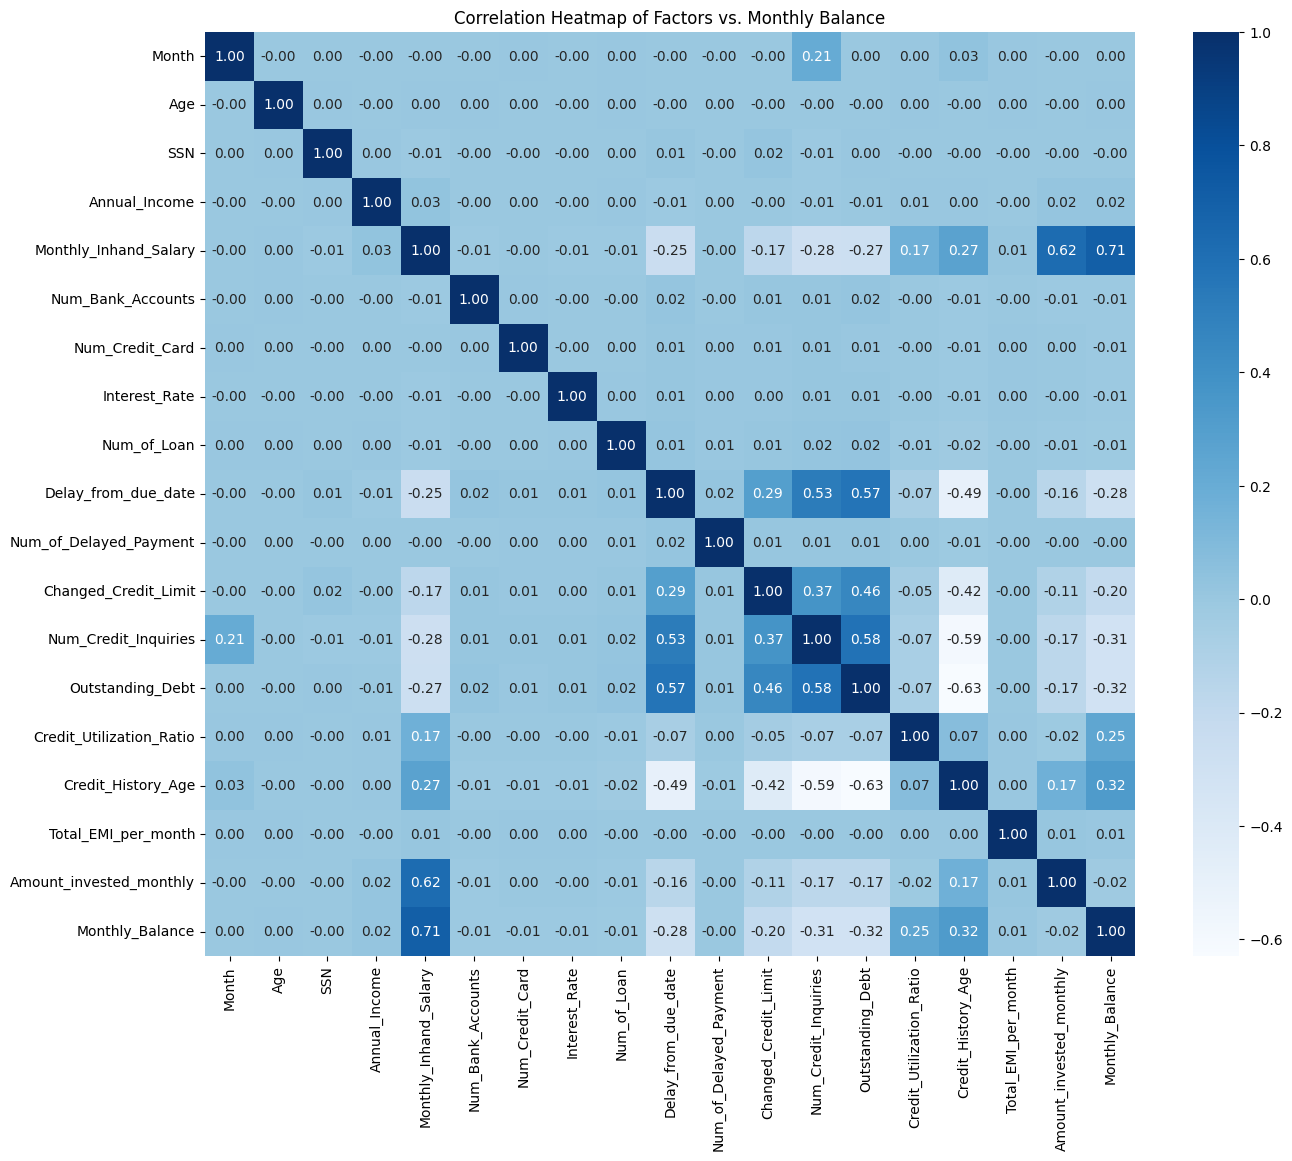

In [49]:
selected_columns=df.select_dtypes(include=["number"])

correlation_matrix=selected_columns.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True, cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap of Factors vs. Monthly Balance")
plt.show()

In [50]:
df["Amount_invested_monthly"].fillna(value=df.groupby(["Customer_ID", "Monthly_Inhand_Salary"])["Amount_invested_monthly"].transform(custom_mode), inplace=True)
df["Amount_invested_monthly"].isnull().sum()

25

In [51]:
df["Amount_invested_monthly"].fillna(value=df.groupby(["Customer_ID"])["Amount_invested_monthly"].transform(custom_mode), inplace=True)
df["Amount_invested_monthly"].isnull().sum()

0

### 6) Monthly Balance

In [64]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

df["Monthly_Balance"]=imputer.fit_transform(df[["Monthly_Balance"]])

In [65]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [73]:
df_train=df[:len(train_data)]
df_test=df[len(train_data):]

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  Int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  int32  
 5   SSN                       50000 non-null  int64  
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  int32  
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_from_

<a id="8"></a>
## Data Preprocessing

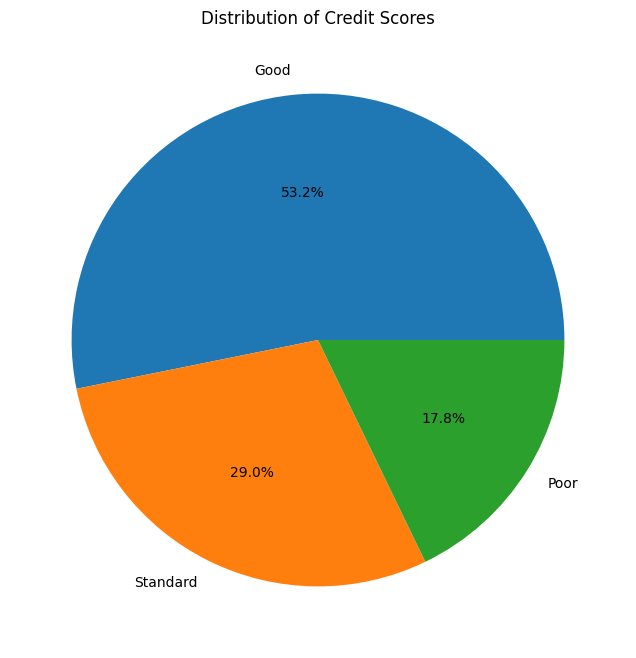

In [75]:
plt.figure(figsize=(8, 8))
plt.pie(df_train['Credit_Score'].value_counts(), labels=df_train['Credit_Score'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Credit Scores')
plt.show()

In [76]:
df_train.ID = df_train.ID.apply(lambda x: int(x,16)).astype(np.int64)
df_train.Customer_ID = df_train.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

df_test.ID = df_test.ID.apply(lambda x: int(x,16)).astype(np.int64)
df_test.Customer_ID = df_test.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

df_train.dtypes

ID                            int64
Customer_ID                   int64
Month                         Int64
Name                         object
Age                           int32
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [77]:

columns=["Credit_Score"]

for item in columns:
    df_train[item]=LabelEncoder().fit_transform(df_train[item])
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,274.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,5636,3392,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [78]:
df_train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [79]:
import category_encoders as ce

columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    df_train[item] =LabelEncoder().fit_transform(df_train[item])
df_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,5635,3392,2,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,31.944960,274.0,1,49.574949,118.280222,3,284.629162,0
2,5636,3392,3,84,500,821000265,12,19114.12,1824.843333,3,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,5637,3392,4,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5638,3392,5,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
5,5639,3392,6,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
6,5640,3392,7,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,22.537593,271.0,1,49.574949,178.344067,5,244.565317,0
7,5641,3392,8,84,23,821000265,12,19114.12,1824.843333,3,...,1,809.98,23.933795,271.0,1,49.574949,24.785217,1,358.124168,2
8,5646,8625,1,7491,28,4075839,13,34847.84,3037.986667,2,...,1,605.03,24.464031,319.0,1,18.816215,104.291825,5,470.690627,2
9,5647,8625,2,7491,28,4075839,13,34847.84,3037.986667,2,...,1,605.03,38.550848,320.0,1,18.816215,40.391238,0,484.591214,0


In [80]:
df_train.drop("Type_of_Loan",axis=1,inplace=True)
df_test.drop("Type_of_Loan",axis=1,inplace=True)

In [81]:
df_train.drop("Monthly_Inhand_Salary",axis=1,inplace=True)

X=df_train.drop('Credit_Score',axis=1)
y = df_train.Credit_Score

In [82]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [83]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

y=to_categorical(y, num_classes=3) # format [0,0,1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=42)

In [85]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

<a id="9"></a>
## Model Building

In [86]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam
from keras.regularizers import L2

In [88]:
model=Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience=20,mode="max",verbose=1)

hist=model.fit(X_train,
               y_train,
               epochs=500,
               batch_size=512,
               validation_data=(X_val,y_val),
               verbose=0)

In [83]:
history_dict=hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

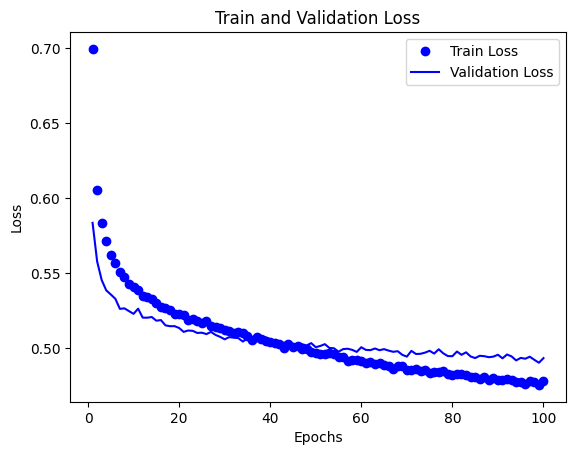

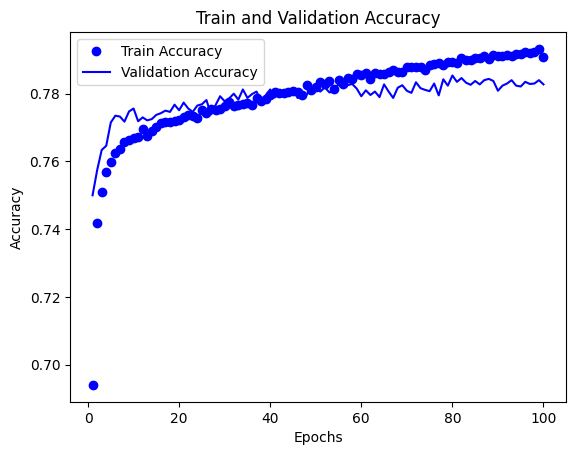

In [84]:
# model evulate:
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values, "bo", label="Train Loss")
plt.plot(epochs,val_loss_values, "b", label="Validation Loss")
plt.title("Train and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()

acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,acc, "bo", label="Train Accuracy")
plt.plot(epochs,val_acc, "b", label="Validation Accuracy")
plt.title("Train and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [85]:
results=model.evaluate(X_test, y_test)
results

  1/625 [..............................] - ETA: 20s - loss: 0.5909 - accuracy: 0.7812

625/625 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7783


[0.5003923177719116, 0.7783499956130981]

 26/250 [==>...........................] - ETA: 0s

250/250 [==============================] - 0s 2ms/step


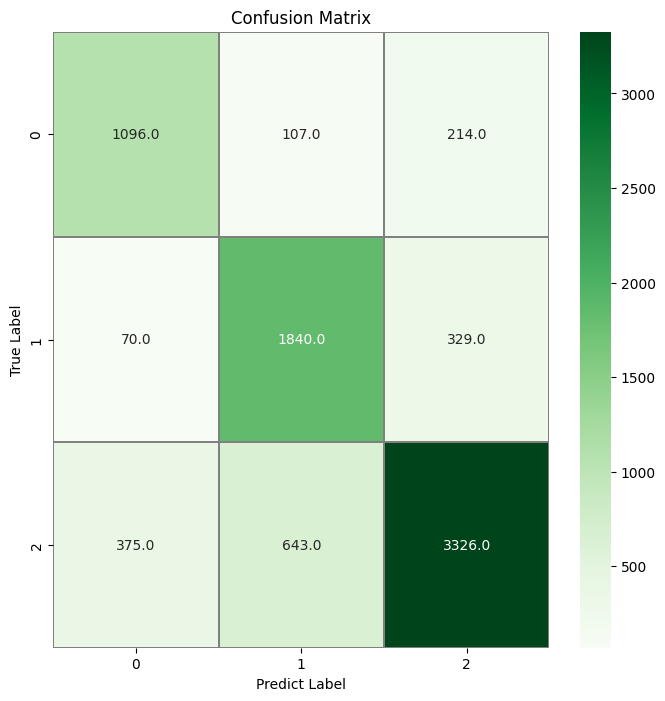

In [87]:
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_val, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

625/625 [==============================] - 2s 3ms/step


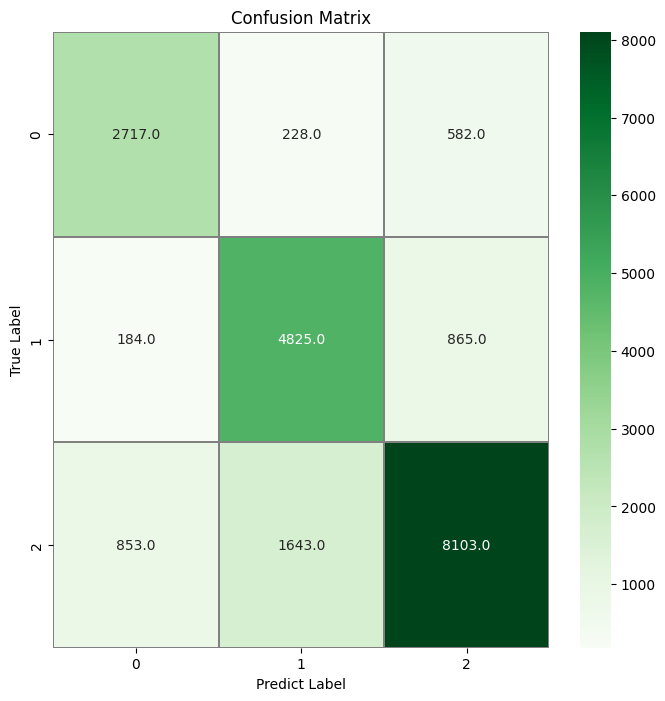

In [80]:
# For TEST
# confusion matrix
Y_pred=model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()